# Softmax exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

This exercise is analogous to the SVM exercise. You will:

- implement a fully-vectorized **loss function** for the Softmax classifier
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** with numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights


In [1]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000, num_dev=500):
  """
  Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
  it for the linear classifier. These are the same steps as we used for the
  SVM, but condensed to a single function.  
  """
  # Load the raw CIFAR-10 data
  cifar10_dir = 'C:\Users\CE INFO\cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]
  mask = np.random.choice(num_training, num_dev, replace=False)
  X_dev = X_train[mask]
  y_dev = y_train[mask]
  
  # Preprocessing: reshape the image data into rows
  X_train = np.reshape(X_train, (X_train.shape[0], -1))
  X_val = np.reshape(X_val, (X_val.shape[0], -1))
  X_test = np.reshape(X_test, (X_test.shape[0], -1))
  X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))
  
  # Normalize the data: subtract the mean image
  mean_image = np.mean(X_train, axis = 0)
  X_train -= mean_image
  X_val -= mean_image
  X_test -= mean_image
  X_dev -= mean_image
  
  # add bias dimension and transform into columns
  X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
  X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
  X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
  X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])
  
  return X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, X_dev, y_dev = get_CIFAR10_data()
print 'Train data shape: ', X_train.shape
print 'Train labels shape: ', y_train.shape
print 'Validation data shape: ', X_val.shape
print 'Validation labels shape: ', y_val.shape
print 'Test data shape: ', X_test.shape
print 'Test labels shape: ', y_test.shape
print 'dev data shape: ', X_dev.shape
print 'dev labels shape: ', y_dev.shape

Train data shape:  (49000L, 3073L)
Train labels shape:  (49000L,)
Validation data shape:  (1000L, 3073L)
Validation labels shape:  (1000L,)
Test data shape:  (1000L, 3073L)
Test labels shape:  (1000L,)
dev data shape:  (500L, 3073L)
dev labels shape:  (500L,)


In [113]:
X_train

array([[ -71.64189796,  -73.98173469,  -69.47391837, ...,  -33.86195918,
         -42.39957143,    1.        ],
       [  23.35810204,   41.01826531,   54.52608163, ...,    7.13804082,
          29.60042857,    1.        ],
       [ 124.35810204,  119.01826531,  122.52608163, ...,  -39.86195918,
         -30.39957143,    1.        ],
       ..., 
       [ -69.64189796,  -62.98173469,  -56.47391837, ...,   34.13804082,
           2.60042857,    1.        ],
       [-120.64189796, -131.98173469, -118.47391837, ...,   48.13804082,
          90.60042857,    1.        ],
       [  44.35810204,   57.01826531,   96.52608163, ...,  -47.86195918,
         -24.39957143,    1.        ]])

## Softmax Classifier

Your code for this section will all be written inside **cs231n/classifiers/softmax.py**. 


In [2]:
# First implement the naive softmax loss function with nested loops.
# Open the file cs231n/classifiers/softmax.py and implement the
# softmax_loss_naive function.

from cs231n.classifiers.softmax import softmax_loss_naive,softmax_loss_vectorized
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print 'loss: %f' % loss
print 'sanity check: %f' % (-np.log(0.1))

NameError: name 'X_dev' is not defined

In [107]:
from cs231n.classifiers.softmax import softmax_loss_naive,softmax_loss_vectorized
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)
loss1, grad = softmax_loss_vectorized(W, X_dev, y_dev, 0.0)
print loss,loss1

2.42412273221 2.42412273221


## Inline Question 1:
Why do we expect our loss to be close to -log(0.1)? Explain briefly.**

**Your answer:** *Fill this in*


In [105]:
# Complete the implementation of softmax_loss_naive and implement a (naive)
# version of the gradient that uses nested loops.
loss, grad = softmax_loss_vectorized1(W, X_dev, y_dev, 0.0)

# As we did for the SVM, use numeric gradient checking as a debugging tool.
# The numeric gradient should be close to the analytic gradient.
from cs231n.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_vectorized1(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

# similar to SVM case, do another gradient check with regularization
loss, grad = softmax_loss_vectorized1(W, X_dev, y_dev, 1e2)
f = lambda w: softmax_loss_vectorized1(w, X_dev, y_dev, 1e2)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 1.794737 analytic: 1.794737, relative error: 1.011152e-08
numerical: -1.701032 analytic: -1.701032, relative error: 2.850852e-08
numerical: -1.400888 analytic: -1.400888, relative error: 3.441323e-08
numerical: -0.379157 analytic: -0.379157, relative error: 2.556100e-08
numerical: 1.867550 analytic: 1.867550, relative error: 5.718534e-09
numerical: -1.041550 analytic: -1.041550, relative error: 2.755339e-08
numerical: -2.369552 analytic: -2.369552, relative error: 1.208018e-08
numerical: -2.143434 analytic: -2.143434, relative error: 2.258637e-08
numerical: -2.758519 analytic: -2.758520, relative error: 1.337190e-08
numerical: -0.290685 analytic: -0.290685, relative error: 1.749490e-07
numerical: -1.064317 analytic: -1.064317, relative error: 1.716646e-08
numerical: 2.416117 analytic: 2.416117, relative error: 4.252300e-08
numerical: -0.151428 analytic: -0.151428, relative error: 1.156232e-07
numerical: 3.924143 analytic: 3.924142, relative error: 1.830834e-08
numerical: -3.

In [109]:
# Now that we have a naive implementation of the softmax loss function and its gradient,
# implement a vectorized version in softmax_loss_vectorized.
# The two versions should compute the same results, but the vectorized version should be
# much faster.
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.00001)
toc = time.time()
print 'naive loss: %e computed in %fs' % (loss_naive, toc - tic)

from cs231n.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_dev, y_dev, 0.00001)
toc = time.time()
print 'vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic)

# As we did for the SVM, we use the Frobenius norm to compare the two versions
# of the gradient.
grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print 'Loss difference: %f' % np.abs(loss_naive - loss_vectorized)
print 'Gradient difference: %f' % grad_difference

naive loss: 2.422325e+00 computed in 0.086000s
vectorized loss: 2.422325e+00 computed in 0.004000s
Loss difference: 0.000000
Gradient difference: 0.000000


In [110]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of over 0.35 on the validation set.
from cs231n.classifiers import Softmax
results = {}
best_val = -1
best_softmax = None
learning_rates = [1e-7, 2e-7, 3e-7, 5e-5, 8e-7]
regularization_strengths = [1e4, 2e4, 3e4, 4e4, 5e4, 6e4, 7e4, 8e4, 1e5]

################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained softmax classifer in best_softmax.                          #
################################################################################
num_iters=200
for lr in learning_rates:
    for reg in regularization_strengths:
        svm = Softmax()
        svm.train(X_train, y_train, learning_rate=lr, reg=reg, num_iters=num_iters)
        
        y_train_pred = svm.predict(X_train)
        acc_train = np.mean(y_train == y_train_pred)
        y_val_pred = svm.predict(X_val)
        acc_val = np.mean(y_val == y_val_pred)
        
        results[(lr,reg)] = (acc_train, acc_val)
        
        if best_val < acc_val:
            best_val = acc_val
            best_svm = svm
################################################################################
#                              END OF YOUR CODE                                #
################################################################################
    
# Print out results.
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy)
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

cs231n\classifiers\softmax.py:95: RuntimeWarning: divide by zero encountered in log
  loss = np.mean(-scores_correct + np.log(np.sum(np.exp(scores),axis=1)))
cs231n\classifiers\softmax.py:96: RuntimeWarning: invalid value encountered in divide
  p = np.exp(scores)/(np.sum(np.exp(scores),axis=1)[:,np.newaxis])


lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.169510 val accuracy: 0.177000
lr 1.000000e-07 reg 2.000000e+04 train accuracy: 0.156327 val accuracy: 0.154000
lr 1.000000e-07 reg 3.000000e+04 train accuracy: 0.174469 val accuracy: 0.171000
lr 1.000000e-07 reg 4.000000e+04 train accuracy: 0.177959 val accuracy: 0.175000
lr 1.000000e-07 reg 5.000000e+04 train accuracy: 0.212816 val accuracy: 0.214000
lr 1.000000e-07 reg 6.000000e+04 train accuracy: 0.208286 val accuracy: 0.215000
lr 1.000000e-07 reg 7.000000e+04 train accuracy: 0.214735 val accuracy: 0.221000
lr 1.000000e-07 reg 8.000000e+04 train accuracy: 0.220163 val accuracy: 0.215000
lr 1.000000e-07 reg 1.000000e+05 train accuracy: 0.246224 val accuracy: 0.265000
lr 2.000000e-07 reg 1.000000e+04 train accuracy: 0.216694 val accuracy: 0.197000
lr 2.000000e-07 reg 2.000000e+04 train accuracy: 0.236429 val accuracy: 0.228000
lr 2.000000e-07 reg 3.000000e+04 train accuracy: 0.235653 val accuracy: 0.254000
lr 2.000000e-07 reg 4.000000

In [115]:
# evaluate on test set
# Evaluate the best softmax on test set
y_test_pred = svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print 'softmax on raw pixels final test set accuracy: %f' % (test_accuracy, )

softmax on raw pixels final test set accuracy: 0.324000


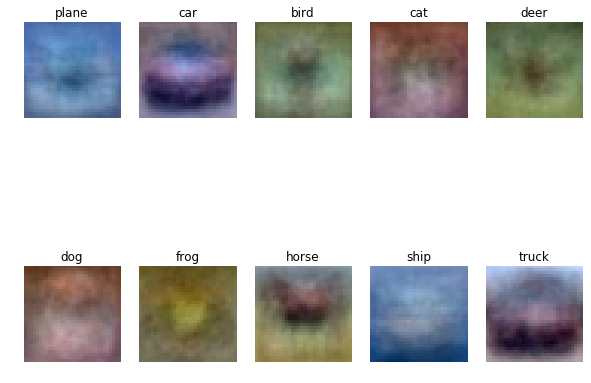

In [116]:
# Visualize the learned weights for each class
w = svm.W[:-1,:] # strip out the bias
w = w.reshape(32, 32, 3, 10)

w_min, w_max = np.min(w), np.max(w)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in xrange(10):
  plt.subplot(2, 5, i + 1)
  
  # Rescale the weights to be between 0 and 255
  wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
  plt.imshow(wimg.astype('uint8'))
  plt.axis('off')
  plt.title(classes[i])